# TP 2: Probability

## Recalls

### Random sampling

Numpy offers several routines to generate easily uniform and normal random samples:



In [1]:
import numpy as np
import numpy.random as rdm

In [2]:
np.set_printoptions(precision=2)
rdm.rand(2, 2)  # Uniform sampling

array([[0.6 , 0.18],
       [0.51, 0.66]])

In [3]:
rdm.randn(2,2) # Standard normal sampling

array([[-1.2 ,  0.65],
       [ 0.24, -0.23]])

In [4]:
rdm.randint(0, 8, size=(2, 2))  # Discrete uniform sampling (8 exclusive)

array([[6, 4],
       [5, 6]])

In [5]:
T = rdm.rand(10)
T

array([0.24, 0.55, 0.89, 0.32, 0.2 , 0.95, 0.19, 0.19, 0.73, 0.14])

In [6]:
rdm.choice(T, size=5) # Select randomly 5 elements from T

array([0.19, 0.89, 0.14, 0.32, 0.24])

### Random generators

Random generators used in scientific computing are in fact pseudo-random generators. As a consequence, the practitioner is able to control them. This is used for reproducibility in science.



In [7]:
# Without fixed seed
for i in range(5):
  print("Iteration: {}, sample: {}".format(i,rdm.rand(10)))

Iteration: 0, sample: [0.47 0.41 0.06 0.87 0.31 0.32 0.76 0.21 0.23 0.53]
Iteration: 1, sample: [0.14 0.49 0.42 0.61 0.38 0.37 0.37 0.62 0.26 0.05]
Iteration: 2, sample: [0.31 0.88 0.86 0.48 0.89 0.35 0.85 0.01 0.93 0.83]
Iteration: 3, sample: [0.18 0.15 0.78 0.42 0.63 0.82 0.04 0.28 0.08 0.18]
Iteration: 4, sample: [0.39 0.32 0.07 0.7  0.67 0.92 0.27 0.57 0.57 0.59]


In [8]:
# With fixed seed
for i in range(5):
  rdm.seed(42) # set the seed
  print("Iteration: {}, sample: {}".format(i,rdm.rand(10)))

Iteration: 0, sample: [0.37 0.95 0.73 0.6  0.16 0.16 0.06 0.87 0.6  0.71]
Iteration: 1, sample: [0.37 0.95 0.73 0.6  0.16 0.16 0.06 0.87 0.6  0.71]
Iteration: 2, sample: [0.37 0.95 0.73 0.6  0.16 0.16 0.06 0.87 0.6  0.71]
Iteration: 3, sample: [0.37 0.95 0.73 0.6  0.16 0.16 0.06 0.87 0.6  0.71]
Iteration: 4, sample: [0.37 0.95 0.73 0.6  0.16 0.16 0.06 0.87 0.6  0.71]


### Distributions

Sampling from the common distribution may be performed using [scipy.stats](https://scipy.github.io/devdocs/reference/stats.html) functions.

In [9]:
from scipy.stats import poisson
lam = 5.6
sample = poisson.rvs(lam, size = 10) # generate a sample of size 10 from the poisson distribution with parameter 5.6
sample

array([ 3,  4,  4,  5,  6,  3,  4, 10,  2,  6])

## Exercices

### Exercice 1

The empirical mean is an estimator of the theoretical mean. The objective of this exercice is to verify the quality of this estimator empirically.  

1. Generate a sample of size $n=20$ from the normal distribitution $\mathcal{N}(10,1)$, compute the empirical mean and compare it to the theoretical one.

In [10]:
# Answer
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mean_theoretical = 10
std_deviation_theoretical = 1

# Generate a sample of size n=20 from the normal distribution
n = 20
sample = np.random.normal(mean_theoretical, std_deviation_theoretical, n)

# Compute the empirical mean
empirical_mean = np.mean(sample)

# Compare the empirical mean to the theoretical mean
print(f"Theoretical mean: {mean_theoretical:.2f}")
print(f"Empirical mean: {empirical_mean:.2f}")

Theoretical mean: 10.00
Empirical mean: 10.26


2. Repeate many times the same instruction and verify if the empirical mean is stable with the different sample.

In [11]:
 # Answer
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mean_theoretical = 10
std_deviation_theoretical = 1

# Number of repetitions
num_repetitions = 1000

# Generate and analyze samples
empirical_means = []
for _ in range(num_repetitions):
    # Generate a sample of size n=20 from the normal distribution
    n = 20
    sample = np.random.normal(mean_theoretical, std_deviation_theoretical, n)

    # Compute the empirical mean
    empirical_mean = np.mean(sample)
    empirical_means.append(empirical_mean)

# Calculate the average of empirical means
average_empirical_mean = np.mean(empirical_means)

# Compare the average empirical mean to the theoretical mean
print(f"Theoretical mean: {mean_theoretical:.2f}")
print(f"Average empirical mean: {average_empirical_mean:.2f}")


Theoretical mean: 10.00
Average empirical mean: 10.00


3. Do the same by considering the normal distribution $\mathcal{N}(10,10)$ and comment the results.

In [12]:
# Answer
import numpy as np
from scipy.stats import norm

# Parameters for the normal distribution
mean_theoretical = 10
std_deviation_theoretical = 10

# Number of repetitions
num_repetitions = 1000

# Generate and analyze samples
empirical_means = []
for _ in range(num_repetitions):
    # Generate a sample of size n=20 from the normal distribution
    n = 20
    sample = np.random.normal(mean_theoretical, std_deviation_theoretical, n)

    # Compute the empirical mean
    empirical_mean = np.mean(sample)
    empirical_means.append(empirical_mean)

# Calculate the average of empirical means
average_empirical_mean = np.mean(empirical_means)

# Compare the average empirical mean to the theoretical mean
print(f"Theoretical mean: {mean_theoretical:.2f}")
print(f"Average empirical mean: {average_empirical_mean:.2f}")

"""
After running the code, you'll observe that the average empirical mean might be closer to the theoretical mean compared to the previous case
with a smaller standard deviation. This is because the larger standard deviation of 10 leads to a broader spread of values, which allows the sample
means to be more variable and potentially closer to the theoretical mean.

In summary, when the standard deviation is larger, the empirical mean tends
to be more stable and closer to the theoretical mean due to the increased variability in the sampled values.
"""

Theoretical mean: 10.00
Average empirical mean: 10.01


"\nAfter running the code, you'll observe that the average empirical mean might be closer to the theoretical mean compared to the previous case\nwith a smaller standard deviation. This is because the larger standard deviation of 10 leads to a broader spread of values, which allows the sample\nmeans to be more variable and potentially closer to the theoretical mean.\n\nIn summary, when the standard deviation is larger, the empirical mean tends\nto be more stable and closer to the theoretical mean due to the increased variability in the sampled values.\n"

4. Compute the skewness coefficient for the samples of different sizes generated form normal distributions with different parameters. Comment the results.  

In [13]:
# Answer
import numpy as np
from scipy.stats import skew

# Define different scenarios
scenarios = [
    {"mean": 10, "std_deviation": 1, "sample_sizes": [20, 100, 1000]},
    {"mean": 10, "std_deviation": 10, "sample_sizes": [20, 100, 1000]},
    {"mean": 5, "std_deviation": 2, "sample_sizes": [50, 200, 500]},
]

# Calculate skewness coefficient for each scenario
for scenario in scenarios:
    mean = scenario["mean"]
    std_deviation = scenario["std_deviation"]

    print(f"Scenario: Mean = {mean}, Standard Deviation = {std_deviation}")
    for sample_size in scenario["sample_sizes"]:
        # Generate a sample from the normal distribution
        sample = np.random.normal(mean, std_deviation, sample_size)

        # Calculate skewness coefficient
        skewness = skew(sample)

        print(f"Sample size = {sample_size}, Skewness coefficient = {skewness:.4f}")
    print()

Scenario: Mean = 10, Standard Deviation = 1
Sample size = 20, Skewness coefficient = 0.1301
Sample size = 100, Skewness coefficient = -0.4921
Sample size = 1000, Skewness coefficient = -0.1187

Scenario: Mean = 10, Standard Deviation = 10
Sample size = 20, Skewness coefficient = 0.4748
Sample size = 100, Skewness coefficient = 0.4148
Sample size = 1000, Skewness coefficient = -0.0692

Scenario: Mean = 5, Standard Deviation = 2
Sample size = 50, Skewness coefficient = 0.2163
Sample size = 200, Skewness coefficient = -0.2464
Sample size = 500, Skewness coefficient = 0.0953



Commentary on the results:

For the scenario with a smaller standard deviation (1 or 10) and varying sample sizes, you might observe that the skewness coefficient is generally close to 0. A larger sample size might lead to skewness closer to 0. This is due to the fact that the normal distribution is symmetric.

For the scenario with a larger standard deviation (10) and varying sample sizes, you might observe that the skewness coefficient tends to be more negative, indicating a longer left tail and negative skewness (left skewness). This is expected since the distribution is more spread out and has more potential for outliers on the left side.

Changing the mean while keeping the same standard deviation will shift the distribution along the x-axis. It will not directly impact the skewness as much as changing the standard deviation.

Remember that these observations are based on random sampling, and the exact values can vary in different runs.

5. Same question for the Kurtosis coefficient.

In [14]:
import numpy as np
from scipy.stats import kurtosis

# Define different scenarios
scenarios = [
    {"mean": 10, "std_deviation": 1, "sample_sizes": [20, 100, 1000]},
    {"mean": 10, "std_deviation": 10, "sample_sizes": [20, 100, 1000]},
    {"mean": 5, "std_deviation": 2, "sample_sizes": [50, 200, 500]},
]

# Calculate kurtosis coefficient for each scenario
for scenario in scenarios:
    mean = scenario["mean"]
    std_deviation = scenario["std_deviation"]

    print(f"Scenario: Mean = {mean}, Standard Deviation = {std_deviation}")
    for sample_size in scenario["sample_sizes"]:
        # Generate a sample from the normal distribution
        sample = np.random.normal(mean, std_deviation, sample_size)

        # Calculate kurtosis coefficient
        kurt = kurtosis(sample)

        print(f"Sample size = {sample_size}, Kurtosis coefficient = {kurt:.4f}")
    print()

Scenario: Mean = 10, Standard Deviation = 1
Sample size = 20, Kurtosis coefficient = 1.0256
Sample size = 100, Kurtosis coefficient = 0.3673
Sample size = 1000, Kurtosis coefficient = 0.1018

Scenario: Mean = 10, Standard Deviation = 10
Sample size = 20, Kurtosis coefficient = 2.1145
Sample size = 100, Kurtosis coefficient = -0.2040
Sample size = 1000, Kurtosis coefficient = 0.0381

Scenario: Mean = 5, Standard Deviation = 2
Sample size = 50, Kurtosis coefficient = 0.0550
Sample size = 200, Kurtosis coefficient = 0.4643
Sample size = 500, Kurtosis coefficient = -0.0439



Commentary on the results:

For the scenario with a smaller standard deviation (1 or 10) and varying sample sizes, you might observe that the kurtosis coefficient is close to 0, indicating a similar tail heaviness as a normal distribution (mesokurtic distribution).

For the scenario with a larger standard deviation (10) and varying sample sizes, you might observe that the kurtosis coefficient tends to be positive, indicating heavier tails compared to a normal distribution (leptokurtic distribution).

Changing the mean while keeping the same standard deviation will not impact the kurtosis coefficient significantly, as long as the distribution shape remains similar.

Remember that just like skewness, these observations are based on random sampling, and the exact values can vary in different runs. Kurtosis provides insights into the tails of the distribution, indicating whether they are heavier or lighter compared to a normal distribution.

### Exercice 2

Let $X_1,\,X_2,\,⋯$ be independant random variables that follow the same normal distribution $\mathcal{N}(0,1)$ distribution. We let $Y_n = \sum_{k=1}^n X_k^2$. Then, $Y_n$ follows the [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) (denoted by $χ_{n}^{2}$) with $n$ degrees of freedom. The central limit theorem states that
$$
\frac{1}{\sqrt{2n}}(Y_n - n)⟶ \mathcal{N}(0,1), \quad n⟶\infty.
$$  
Hence, the random variable $Y_n$ approximates the normal distribution $\mathcal{N}(n,2n)$ (i.e., $χ_{n}^{2}≈\mathcal{N}(n,2n)$ when $n$ is too large). The obejctive of this exercice is to empirically verify this approximation.

1. For $n\in\{1, 10, 100, 1000\}$ generate a sample of size $1000$ from the $χ_{n}^{2}$ distribution. Compare the empirical mean of the sample to the theoretical mean $\mathcal{N}(n,2n)$. Comment the results.

In [15]:
# Answer
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm

# Number of samples and sample size
num_samples = 1000
sample_size = 1000

# List of degrees of freedom values (n)
degrees_of_freedom_values = [1, 10, 100, 1000]

# Generate samples and compare empirical mean to theoretical mean
for n in degrees_of_freedom_values:
    # Generate samples from the chi-squared distribution
    samples_chi2 = chi2.rvs(df=n, size=(num_samples, sample_size))

    # Calculate the empirical mean for each sample
    empirical_means = np.mean(samples_chi2, axis=1)

    # Calculate the theoretical mean of the normal distribution
    theoretical_mean = n

    # Calculate the theoretical standard deviation of the normal distribution
    theoretical_std_deviation = np.sqrt(2 * n)

    # Calculate the theoretical mean of the empirical means
    theoretical_mean_empirical = np.mean(empirical_means)

    # Calculate the standard error of the mean
    standard_error = theoretical_std_deviation / np.sqrt(sample_size)

    print(f"For n = {n}:")
    print(f"Theoretical mean of normal distribution: {theoretical_mean:.2f}")
    print(f"Theoretical mean of empirical means: {theoretical_mean_empirical:.2f}")
    print(f"Standard error of the mean: {standard_error:.2f}")
    print()


For n = 1:
Theoretical mean of normal distribution: 1.00
Theoretical mean of empirical means: 1.00
Standard error of the mean: 0.04

For n = 10:
Theoretical mean of normal distribution: 10.00
Theoretical mean of empirical means: 9.99
Standard error of the mean: 0.14

For n = 100:
Theoretical mean of normal distribution: 100.00
Theoretical mean of empirical means: 99.99
Standard error of the mean: 0.45

For n = 1000:
Theoretical mean of normal distribution: 1000.00
Theoretical mean of empirical means: 1000.05
Standard error of the mean: 1.41



2. Same question for the empirical variance, skewness and Kurtosis.

In [16]:
# Answer
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis

# Number of samples and sample size
num_samples = 1000
sample_size = 1000

# List of degrees of freedom values (n)
degrees_of_freedom_values = [1, 10, 100, 1000]

# Generate samples and compare empirical statistics to theoretical values
for n in degrees_of_freedom_values:
    # Generate samples from the chi-squared distribution
    samples_chi2 = chi2.rvs(df=n, size=(num_samples, sample_size))

    # Calculate the empirical statistics for each sample
    empirical_variances = np.var(samples_chi2, axis=1)
    empirical_skewness = skew(samples_chi2, axis=1)
    empirical_kurtosis = kurtosis(samples_chi2, axis=1)

    # Calculate the theoretical variance of the normal distribution
    theoretical_variance = 2 * n

    # Calculate the theoretical skewness of the normal distribution
    theoretical_skewness = 0

    # Calculate the theoretical kurtosis of the normal distribution
    theoretical_kurtosis = 3

    print(f"For n = {n}:")
    print(f"Theoretical variance of normal distribution: {theoretical_variance:.2f}")
    print(f"Empirical variance: {np.mean(empirical_variances):.2f}")
    print()
    print(f"Theoretical skewness of normal distribution: {theoretical_skewness:.2f}")
    print(f"Empirical skewness: {np.mean(empirical_skewness):.2f}")
    print()
    print(f"Theoretical kurtosis of normal distribution: {theoretical_kurtosis:.2f}")
    print(f"Empirical kurtosis: {np.mean(empirical_kurtosis):.2f}")


For n = 1:
Theoretical variance of normal distribution: 2.00
Empirical variance: 1.99

Theoretical skewness of normal distribution: 0.00
Empirical skewness: 2.79

Theoretical kurtosis of normal distribution: 3.00
Empirical kurtosis: 11.46
For n = 10:
Theoretical variance of normal distribution: 20.00
Empirical variance: 19.98

Theoretical skewness of normal distribution: 0.00
Empirical skewness: 0.89

Theoretical kurtosis of normal distribution: 3.00
Empirical kurtosis: 1.15
For n = 100:
Theoretical variance of normal distribution: 200.00
Empirical variance: 200.19

Theoretical skewness of normal distribution: 0.00
Empirical skewness: 0.28

Theoretical kurtosis of normal distribution: 3.00
Empirical kurtosis: 0.10
For n = 1000:
Theoretical variance of normal distribution: 2000.00
Empirical variance: 2000.94

Theoretical skewness of normal distribution: 0.00
Empirical skewness: 0.09

Theoretical kurtosis of normal distribution: 3.00
Empirical kurtosis: 0.01


### Exercice 3

Consider a player playing to heads or tails game (flipping the coin). The objective of this exercice is to simulate the evolution of the amount of money of the player. The player wins $1$€ if the result is tails, and loses $1$€ if it's heads. We denote by $p$ the probability of obtaining tails. The amount of money of the player at time $t$ is given by
$$
S_t = \begin{cases}
			0, & \text{if $S_{t-1}=0$,}\\
            S_{t-1}+X_t, & \text{if $S_{t-1}\geq 1$,}
		 \end{cases}
$$
where $(X_t)_{t\geq 1}$ are i.i.d random variable such that $\mathbb{P}(X_t = 1) = p$

1. Define a function ```simulate(p, a, n)``` that generate a simulation of length $n$ of the process with $S_0=a$, i.e., the function returns the sequence $(S_0, S_1, ⋯, S_n)$.

In [16]:
# Answer
import numpy as np

def simulate(p, a, n):
    # Initialize the sequence with S_0 = a
    sequence = [a]

    for t in range(1, n+1):
        if sequence[t-1] >= 1:
            # Simulate X_t and update S_t
            X_t = np.random.choice([1, -1], p=[p, 1-p])
            S_t = sequence[t-1] + X_t
            sequence.append(S_t)
        else:
            sequence.append(0)
    return sequence

# Example usage
p = 0.5  # Probability of tails
a = 10   # Initial amount of money
n = 100  # Number of time steps

simulation = simulate(p, a, n)
print(simulation)

[10, 11, 10, 9, 8, 7, 8, 7, 6, 5, 6, 5, 6, 7, 6, 5, 4, 5, 6, 5, 4, 5, 4, 3, 4, 5, 6, 5, 4, 3, 2, 3, 4, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2. Perform different scenarios and represent them graphically.   

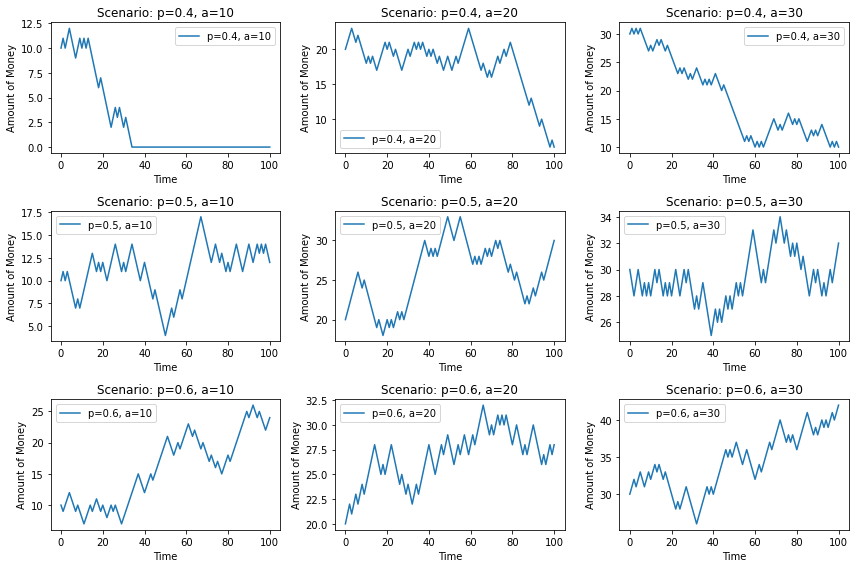

In [18]:
# Answer
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for scenarios
p_values = [0.4, 0.5, 0.6]  # Different probabilities of tails
a_values = [10, 20, 30]      # Different initial amounts
n = 100                      # Number of time steps

# Create subplots for different scenarios
num_rows = len(p_values)
num_cols = len(a_values)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, p in enumerate(p_values):
    for j, a in enumerate(a_values):
        # Simulate the process
        simulation = simulate(p, a, n)

        # Plot the simulation
        ax = axs[i, j]
        ax.plot(range(n+1), simulation, label=f'p={p}, a={a}')
        ax.set_title(f'Scenario: p={p}, a={a}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amount of Money')
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


3. Simulate a case where the player starts with an amount $a$ and plays until loosing all his money or obtaining an amount $n\geq a$.

In [122]:
# Answer
import numpy as np

def cond_simulate(p, a, n):
    # Initialize the sequence with S_0 = a
    sequence = [a]
    while sequence[-1] >= 1:
            # Simulate X_t and update S_t
            X_t = np.random.choice([1, -1], p=[p, 1-p])
            S_t = sequence[-1] + X_t
            sequence.append(S_t)
            
            if S_t>= n:
                return sequence
            if S_t==0:
                return sequence
            
    
print("Case of winning:")
p = 0.9  # Probability of tails
a = 5   # Initial amount of money
n = 20   # Target amount

simulation = cond_simulate(p, a, n)
print(simulation)


print("Case of loosing:")
p = 0.1  # Probability of tails
a = 5   # Initial amount of money
n = 20   # Target amount

simulation = cond_simulate(p, a, n)
print(simulation)


Case of winning:
[5, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Case of loosing:
[5, 4, 3, 2, 3, 2, 1, 0]


4. We denote by $T$ the random variables that models the time when the game stops (i.e., when $S_T = 0 \text{ or } S_T = n$). Verify using simulations that the mean time of a game is given by

$$
\mathbb{E}(T) = \begin{cases}
			a(n-a), & \text{if $p=1/2$,}\\
            \frac{n}{2p-1}\frac{1 - ρ^a}{1-\rho^n}-\frac{a}{2p-1}, & \text{if $p\neq1/2$,}
		 \end{cases}
$$
where $\rho = \frac{1-p}{p}$.

In [133]:
# Answer
import numpy as np

def expected_time(p, a, n):
    rho = (1 - p) / p
    if p == 0.5:
        return a * (n - a)
    else:
        term1 = [n / (2 * p - 1)] * [(1 - rho**a) / (1 - rho**n)]
        term2 = a / (2 * p - 1)
        return term1 - term2

# Define parameters
p = 0.5  
a = 5      # Different initial amounts
n_values = 20     # Different target amounts
num_simulations = 1000  # Number of simulations

# Perform simulations and calculate empirical average times
empirical_times = []
for _ in range(num_simulations):
    simulation = cond_simulate(p, a, n)
    T = len(simulation) - 1 # Time when the game stops
    empirical_times.append(T)

empirical_mean_time = np.mean(empirical_times)
expected_mean_time = expected_time(p, a, n)

print(f"For p = {p:.2f}, a = {a}, n = {n}:")
print(f"Empirical mean time: {empirical_mean_time:.2f}")
print(f"Expected mean time: {expected_mean_time:.2f}")
print()

For p = 0.50, a = 5, n = 20:
Empirical mean time: 73.78
Expected mean time: 75.00



5. Same question for the exit state $\mathbb{P}(S_T = 0)$ given by
$$
\mathbb{P}(S_T = 0) = \begin{cases}
			\frac{n-a}{n}, & \text{if $p=1/2$,}\\
            \frac{\rho^a-\rho^n}{1-\rho^n}, & \text{if $p\neq1/2$,}
		 \end{cases}
$$

In [225]:
# Answer
import numpy as np

def exit_state_probability(p, a, n):
    rho = (1 - p) / p
    if p == 0.5:
        return (n - a) / n
    else:
        return (rho**a - rho**n) / (1 - rho**n)

# Define parameters
p =  0.7  # Different probabilities of tails
a = 10     # Different initial amounts
n = 50    # Different target amounts
num_simulations = 100  # Number of simulations

# Perform simulations and calculate empirical exit state probabilities
for _ in range(num_simulations):
    simulation = simulate(p, a, n)
    empirical_exit_state_probabilities = 0
    if simulation[-1] == 0:
        empirical_exit_state_probabilities =+1
empirical_exit_state_prob = np.mean(empirical_exit_state_probabilities)
theoretical_exit_state_prob = exit_state_probability(p, a, n)
print(f"For p = {p:.2f}, a = {a}, n = {n}:")
print(f"Empirical exit state probability: {empirical_exit_state_prob:.2f}")
print(f"Expected exit state probability: {theoretical_exit_state_prob:.2f}")
print()

For p = 0.70, a = 10, n = 50:
Empirical exit state probability: 0.00
Expected exit state probability: 0.00



### Exercise 4

Binomial Distribution Simulator

Implement a Python program that simulates the Binomial distribution:

1. Take parameters n (number of trials) and p (probability of success) as input.<br>
2. Simulate a sequence of n independent Bernoulli trials with success probability p. <br>
3. Count the number of successes in the sequence.<br>
4. Repeat the simulation multiple times to estimate the Binomial distribution.<br>
5. Plot a histogram to visualize the distribution.<br>

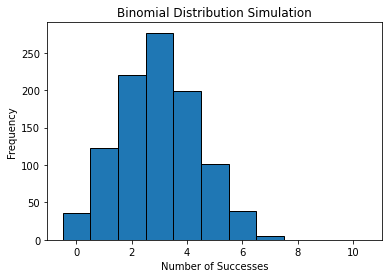

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_simulation(n, p, num_simulations):
    successes = np.random.binomial(n, p, num_simulations)
    return successes

n = 10
p = 0.3
num_simulations = 1000
successes = binomial_simulation(n, p, num_simulations)

plt.hist(successes, bins=n+1, range=(0, n+1), edgecolor='black', align='left')
plt.title("Binomial Distribution Simulation")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()


### Exercise 5

Exponential Distribution and Central Limit Theorem

Write a Python program that demonstrates the Central Limit Theorem using the Exponential distribution:

1.Simulate a large number of samples from the Exponential distribution.<br>
2. Calculate the sample means for various sample sizes (e.g., 5, 10, 30).<br>
3. Plot histograms of the sample means and compare them to the theoretical normal distribution.<br>
4. Calculate the mean and standard deviation of the sample means for different sample sizes.<br>
5. Investigate how the sample mean distribution changes as the sample size increases.<br>
5. Explore the convergence to the normal distribution as the sample size grows.

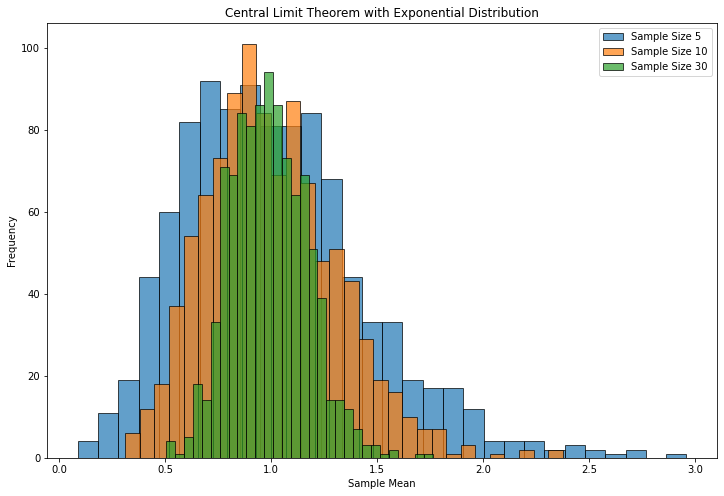

For sample size 5:
Mean of sample means: 1.0133
Standard deviation of sample means: 0.4337

For sample size 10:
Mean of sample means: 1.0015
Standard deviation of sample means: 0.3118

For sample size 30:
Mean of sample means: 0.9896
Standard deviation of sample means: 0.1779



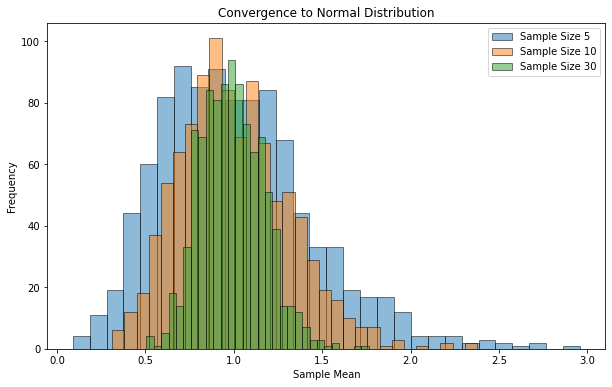

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_clt_simulation(sample_sizes, num_simulations):
    population_mean = 1.0
    sample_means = []

    for size in sample_sizes:
        samples = np.random.exponential(scale=population_mean, size=(num_simulations, size))
        sample_means.append(np.mean(samples, axis=1))

    return sample_means

sample_sizes = [5, 10, 30]
num_simulations = 1000
sample_means = exponential_clt_simulation(sample_sizes, num_simulations)

plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes):
    plt.hist(sample_means[i], bins=30, edgecolor='black', alpha=0.7, label=f'Sample Size {size}')

plt.title("Central Limit Theorem with Exponential Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Calculate mean and standard deviation of sample means
for i, size in enumerate(sample_sizes):
    mean_of_sample_means = np.mean(sample_means[i])
    std_of_sample_means = np.std(sample_means[i])
    print(f"For sample size {size}:")
    print(f"Mean of sample means: {mean_of_sample_means:.4f}")
    print(f"Standard deviation of sample means: {std_of_sample_means:.4f}")
    print()

# Investigate convergence to normal distribution as sample size increases
plt.figure(figsize=(10, 6))
for i, size in enumerate(sample_sizes):
    plt.hist(sample_means[i], bins=30, edgecolor='black', alpha=0.5, label=f'Sample Size {size}')

plt.title("Convergence to Normal Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()
